K-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

For finding closest similar points, you find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. Euclidean distance is a popular and familiar choice. KNN has the following basic steps:

* Calculate distance
* Find closest neighbors
* Vote for labels

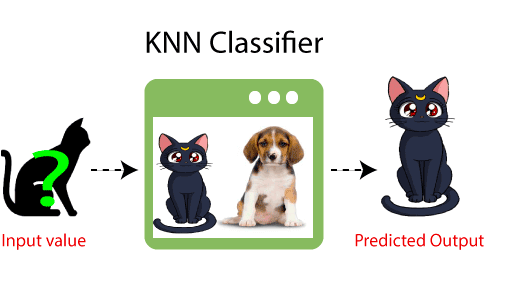

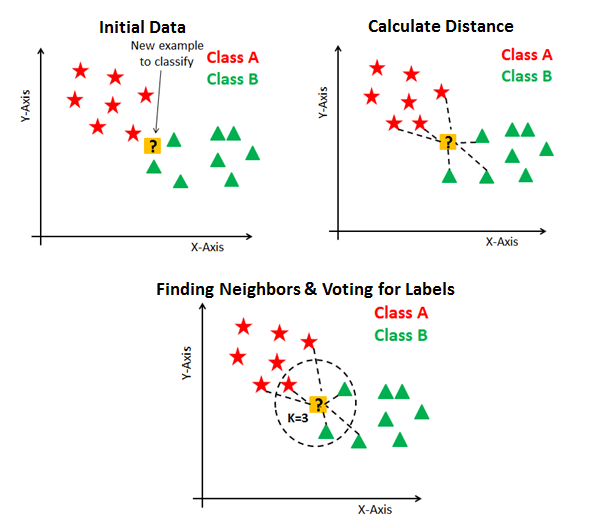

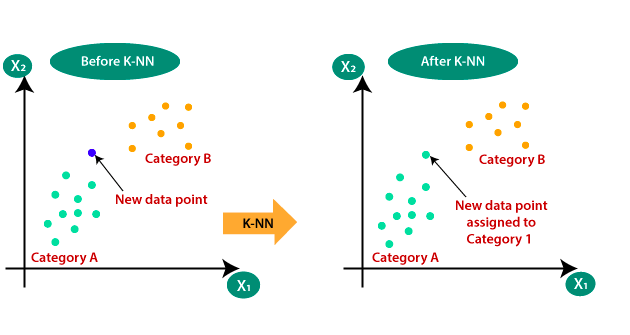

#How does K-NN work?
The K-NN working can be explained on the basis of the below algorithm:

* Step-1: Select the number K of the neighbors
* Step-2: Calculate the Euclidean distance of K number of neighbors
* Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
* Step-4: Among these k neighbors, count the number of the data points in each category.
* Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
* Step-6: Our model is ready.

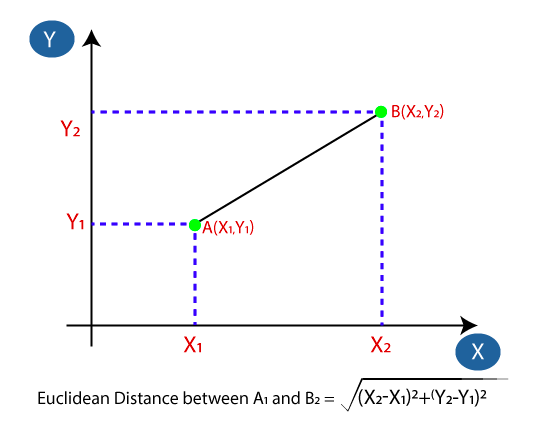

## Advantages of KNN Algorithm:
* It is simple to implement.
* It is robust to the noisy training data
*It can be more effective if the training data is large.
##Disadvantages of KNN Algorithm:
* Always needs to determine the value of K which may be complex some time.
* The computation cost is high because of calculating the distance between the data points for all the training samples.

#get Data

In [1]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/emails.csv

--2024-04-16 09:06:08--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/emails.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31243156 (30M) [text/plain]
Saving to: ‘emails.csv’

emails.csv          100%[===================>]  29.79M   161MB/s    in 0.2s    

2024-04-16 09:06:09 (161 MB/s) - ‘emails.csv’ saved [31243156/31243156]



# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

# Load Data

In [3]:
dataset=pd.read_csv('emails.csv')
dataset.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
dataset.Prediction.unique()

array([0, 1])

In [5]:
dataset.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [6]:
# verify that there are no null columns in the dataset
dataset[dataset.isnull().any(axis=1)]

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction


In [7]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']

In [8]:
print('There are {} categorical variables : \n'.format(len(categorical)), categorical)

There are 1 categorical variables : 
 ['Email No.']


In [9]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(dataset[var].unique()), ' labels')

Email No.  contains  5172  labels


In [12]:
# view summary statistics in numerical variables to check for outliers
print(round(dataset[numerical].describe()),2)

          the      to     ect     and     for      of       a     you     hou  \
count  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0  5172.0   
mean      7.0     6.0     5.0     3.0     3.0     3.0    56.0     2.0     2.0   
std      12.0    10.0    14.0     6.0     5.0     6.0    88.0     4.0     7.0   
min       0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     1.0     1.0     0.0     1.0     0.0    12.0     0.0     0.0   
50%       3.0     3.0     1.0     1.0     2.0     1.0    28.0     1.0     0.0   
75%       8.0     7.0     4.0     3.0     4.0     2.0    62.0     3.0     1.0   
max     210.0   132.0   344.0    89.0    47.0    77.0  1898.0    70.0   167.0   

           in  ...  connevey     jay  valued     lay  infrastructure  \
count  5172.0  ...    5172.0  5172.0  5172.0  5172.0          5172.0   
mean     11.0  ...       0.0     0.0     0.0     0.0             0.0   
std      19.0  ...       0.0     0.0     0.0     1.0  

# Data Preprocessing

In [14]:
y = dataset['Prediction']
x = dataset.drop(['Prediction','Email No.'], axis=1)#Email.No deosn't hold any data. It is just an index.

In [15]:
print(x.head())

   the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  connevey  \
0    0   0    1    0    0   0    2    0    0   0  ...             0         0   
1    8  13   24    6    6   2  102    1   27  18  ...             0         0   
2    0   0    1    0    0   0    8    0    0   4  ...             0         0   
3    0   5   22    0    5   1   51    2   10   1  ...             0         0   
4    7   6   17    1    5   2   57    0    9   3  ...             0         0   

   jay  valued  lay  infrastructure  military  allowing  ff  dry  
0    0       0    0               0         0         0   0    0  
1    0       0    0               0         0         0   1    0  
2    0       0    0               0         0         0   0    0  
3    0       0    0               0         0         0   0    0  
4    0       0    0               0         0         0   1    0  

[5 rows x 3000 columns]


In [16]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64


# Splitting the dataset into training and test set  

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0) # func returns train and test data. It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training and random_state


In [18]:
print(x_train.head())

      the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
3459    5   4    1    2    2   3   27    7    0   8  ...             0   
1385    3   6    4    6    0   2   57    2    0  23  ...             0   
1380    1   0    1    0    0   1    8    0    0   5  ...             0   
4462   37  16    5   22    5  19  228    6    2  57  ...             0   
3840    2   1    1    0    2   0   10    0    0   0  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
3459         0    0       0    0               0         0         0   0    0  
1385         0    0       0    0               0         0         0   1    0  
1380         0    0       0    0               0         0         0   0    0  
4462         0    0       0    2               0         0         0   1    0  
3840         0    0       0    0               0         0         0   0    0  

[5 rows x 3000 columns]


In [19]:
print(x_test.head())

      the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  \
3324   14   7    2    2    2   4   37    0    1   9  ...             0   
15      6   2    1    0    2   0   36    3    1   8  ...             0   
4950   40   6    4    6    5  11  130    3    0  31  ...             0   
3964   42  19    1    8    7   7  214    1    3  52  ...             0   
2315    8  14    8    3    3   0   87    0    4  10  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
3324         0    0       0    0               0         0         0   0    0  
15           0    0       0    0               0         0         0   0    0  
4950         0    0       0    0               0         0         0   1    0  
3964         0    0       0    1               0         4         0   3    0  
2315         0    0       0    0               0         0         0   5    0  

[5 rows x 3000 columns]


In [20]:
print(y_train[:10])

3459    1
1385    0
1380    0
4462    1
3840    0
1452    1
2849    0
3145    0
1271    0
1021    0
Name: Prediction, dtype: int64


In [21]:
print(y_test[:10])

3324    0
15      0
4950    0
3964    1
2315    0
861     1
2350    0
1767    0
965     0
2630    1
Name: Prediction, dtype: int64


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train) # apply on whole x data
x_test=scaler.transform(x_test)

# Build Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski') # by default n_neighbors = 5
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [24]:
y_pred = classifier.predict(x_test)

# Evaluate Model

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, average_precision_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1013   98]
 [  69  372]]


In [26]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1111
           1       0.79      0.84      0.82       441

    accuracy                           0.89      1552
   macro avg       0.86      0.88      0.87      1552
weighted avg       0.90      0.89      0.89      1552



In [27]:
accuracy_score(y_test,y_pred)

0.8923969072164949

In [28]:
average_precision= average_precision_score(y_test,y_pred)
print(average_precision)

0.7121096530298893
